In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy import stats

from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

from sklearn.linear_model import LogisticRegression
from sklearn import tree

from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv("../data/raw/Ecommerce_Consumer_Behavior_Analysis_Data.csv")
data.head()

,Customer_ID,Age,Gender,Income_Level,Marital_Status,Education_Level,Occupation,Location,Purchase_Category,Purchase_Amount,...,Customer_Satisfaction,Engagement_with_Ads,Device_Used_for_Shopping,Payment_Method,Time_of_Purchase,Discount_Used,Customer_Loyalty_Program_Member,Purchase_Intent,Shipping_Preference,Time_to_Decision
0,37-611-6911,22,Female,Middle,Married,Bachelor's,Middle,Évry,Gardening & Outdoors,$333.80,...,7,NaN,Tablet,Credit Card,3/1/2024,True,False,Need-based,No Preference,2
1,29-392-9296,49,Male,High,Married,High School,High,Huocheng,Food & Beverages,$222.22,...,5,High,Tablet,PayPal,4/16/2024,True,False,Wants-based,Standard,6
2,84-649-5117,24,Female,Middle,Single,Master's,High,Huzhen,Office Supplies,$426.22,...,7,Low,Smartphone,Debit Card,3/15/2024,True,True,Impulsive,No Preference,3
3,48-980-6078,29,Female,Middle,Single,Master's,Middle,Wiwilí,Home Appliances,$101.31,...,1,NaN,Smartphone,Other,10/4/2024,True,True,Need-based,Express,10
4,91-170-9072,33,Female,Middle,Widowed,High School,Middle,Nara,Furniture,$211.70,...,10,NaN,Smartphone,Debit Card,1/30/2024,False,False,Wants-based,No Preference,4


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Customer_ID                            1000 non-null   object 
 1   Age                                    1000 non-null   int64  
 2   Gender                                 1000 non-null   object 
 3   Income_Level                           1000 non-null   object 
 4   Marital_Status                         1000 non-null   object 
 5   Education_Level                        1000 non-null   object 
 6   Occupation                             1000 non-null   object 
 7   Location                               1000 non-null   object 
 8   Purchase_Category                      1000 non-null   object 
 9   Purchase_Amount                        1000 non-null   object 
 10  Frequency_of_Purchase                  1000 non-null   int64  
 11  Purch

In [4]:
data.describe()

,Age,Frequency_of_Purchase,Brand_Loyalty,Product_Rating,Time_Spent_on_Product_Research(hours),Return_Rate,Customer_Satisfaction,Time_to_Decision
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,34.304000,6.945000,3.026000,3.033000,1.013030,0.954000,5.399000,7.547000
std,9.353238,3.147361,1.416803,1.436654,0.791802,0.810272,2.868454,4.035849
min,18.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
25%,26.000000,4.000000,2.000000,2.000000,0.000000,0.000000,3.000000,4.000000
50%,34.500000,7.000000,3.000000,3.000000,1.000000,1.000000,5.000000,8.000000
75%,42.000000,10.000000,4.000000,4.000000,2.000000,2.000000,8.000000,11.000000
max,50.000000,12.000000,5.000000,5.000000,2.000000,2.000000,10.000000,14.000000


### Data Cleaning

In [5]:
z_scores = np.abs(stats.zscore(data.select_dtypes(include=np.number)))
data[(z_scores > 3).all(axis = 1)] # There are no outliers 

,Customer_ID,Age,Gender,Income_Level,Marital_Status,Education_Level,Occupation,Location,Purchase_Category,Purchase_Amount,...,Customer_Satisfaction,Engagement_with_Ads,Device_Used_for_Shopping,Payment_Method,Time_of_Purchase,Discount_Used,Customer_Loyalty_Program_Member,Purchase_Intent,Shipping_Preference,Time_to_Decision


In [ ]:
for col in data.columns:
    if data[col].isnull().sum() > 0:
        print(f"{col} has {data[col].isnull().sum()} null values")

Social_Media_Influence has 247 null values
Engagement_with_Ads has 256 null values


In [ ]:
data['Social_Media_Influence'] = data['Social_Media_Influence'].fillna(data['Social_Media_Influence'].mode()[0]) # Replace null values with model
data['Engagement_with_Ads'] = data['Engagement_with_Ads'].fillna(data['Engagement_with_Ads'].mode()[0])  # Replace null values with model

print(f"Total number of columns with missing values after clean up: {data.isnull().any().sum()}")

data.duplicated().value_counts() # There are no duplicated columns


Total number of columns with missing values after clean up: 0


False    1000
Name: count, dtype: int64

In [8]:
# Looking at data.info() and checking against data, 'Purchase_Amount' could be converted to a float
data['Purchase_Amount'] = data['Purchase_Amount'].str.replace('$', '').astype(float)
assert data['Purchase_Amount'].dtype == 'float64'

In [9]:
# Data type conversions
numeric_cols = data.select_dtypes(include=["int64", "float64"]).columns
string_cols = data.select_dtypes(include="object").columns

In [10]:
data.groupby('Income_Level')['Purchase_Amount'].mean()

Income_Level
High      275.511631
Middle    274.588433
Name: Purchase_Amount, dtype: float64

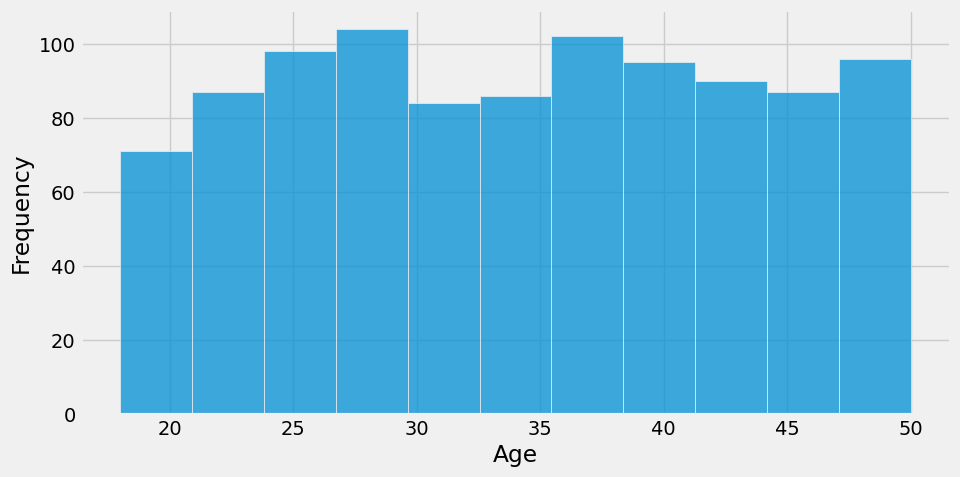

In [11]:
plt.figure(figsize=(10, 5))
sns.histplot(x = data['Age'])
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

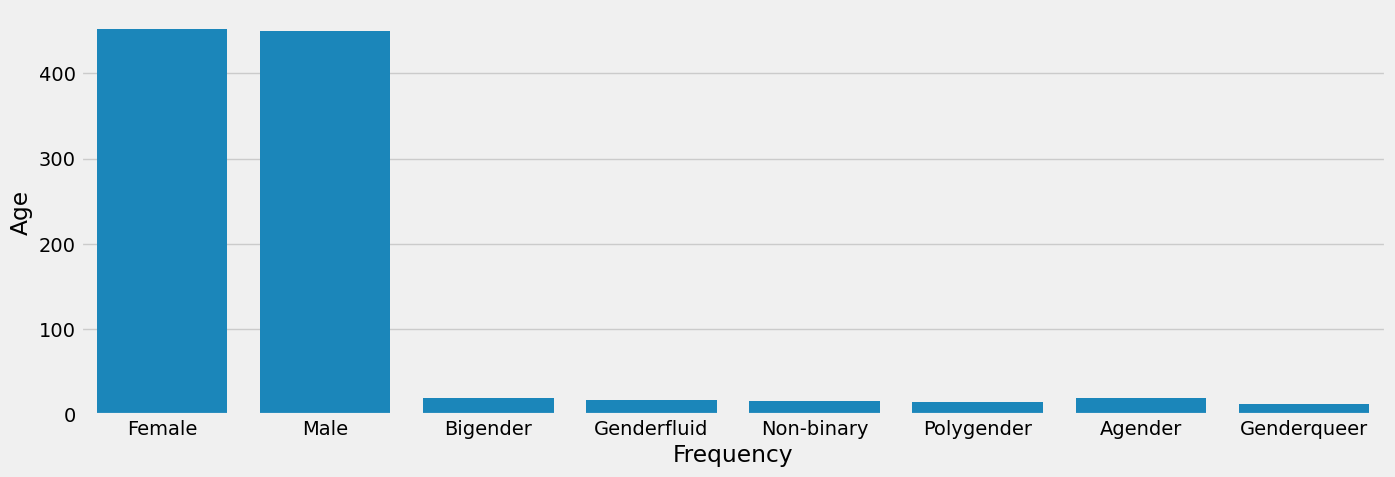

In [12]:
plt.figure(figsize=(15, 5))
sns.countplot(x = data['Gender'])
plt.xlabel("Frequency")
plt.ylabel("Age")
plt.show()

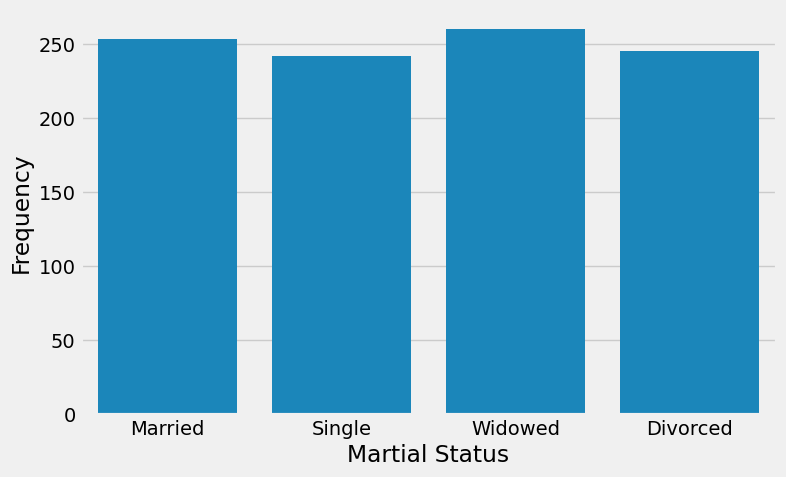

In [13]:
plt.figure(figsize=(8, 5))
sns.countplot(x = data['Marital_Status'])
plt.xlabel('Martial Status')
plt.ylabel('Frequency')
plt.show()

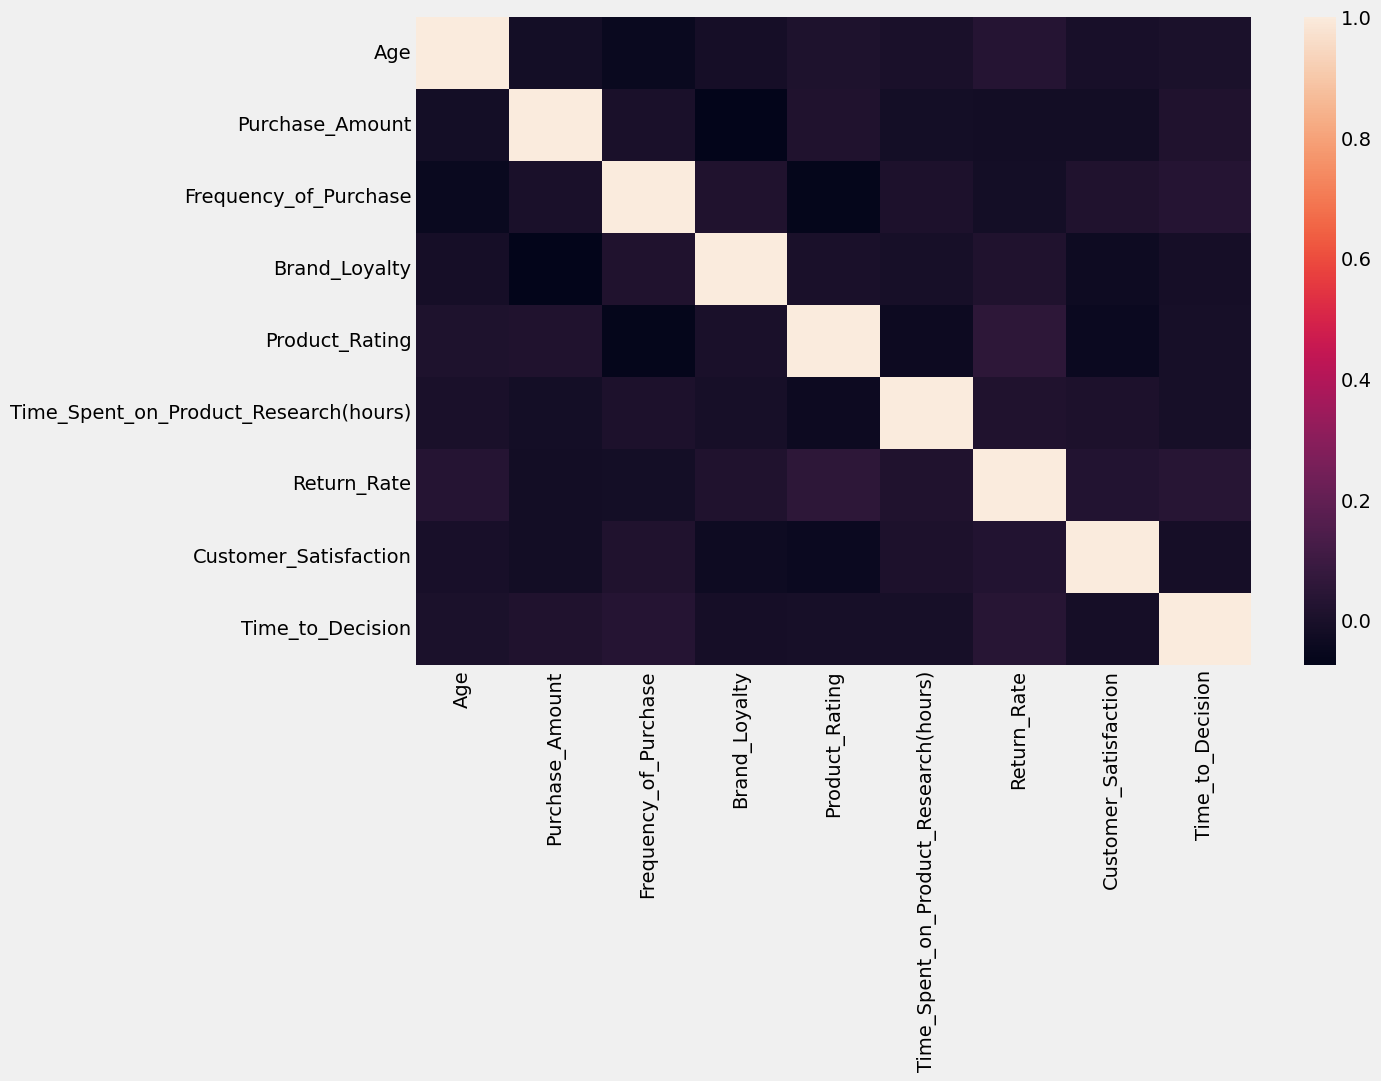

In [14]:
plt.figure(figsize=(12, 8))
sns.heatmap(data[numeric_cols].corr())
plt.show()


### Data Transformation

In [15]:
# No need to apply scaler to the dependent variables we are going to work on
scaler = StandardScaler()
cols_to_scale = data[numeric_cols].drop(['Purchase_Amount', 'Customer_Satisfaction'], axis = 1).columns 
data[cols_to_scale] = scaler.fit_transform(data[cols_to_scale])

In [16]:
# One-hot encode 
cols_to_onehot = data[string_cols].drop(['Customer_ID', 'Time_of_Purchase', 'Location'], axis = 1).columns.tolist()
data = pd.get_dummies(data, columns=cols_to_onehot, drop_first=True)

### Explore a Machine Learning Algorithm


#### LinearRegression

In [17]:
X = data.drop(['Customer_ID', 'Location', 'Time_of_Purchase', 'Purchase_Amount'], axis = 1) # These don't have predictive power or are DV
y = data['Purchase_Amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg = LinearRegression().fit(X_train, y_train)

# Test against the test 
y_prediction = reg.predict(X_test)

mse = mean_squared_error(y_test, y_prediction)
rmse = np.sqrt(mse)
print(f"MSE = {mse}. RMSE = {rmse}.") # MSE = 18819.681327525523. RMSE = 137.18484365091328.
# The resulting MSE is quite high. The model might as well just choose the mean value for every given input.

MSE = 18819.681327525523. RMSE = 137.18484365091328.


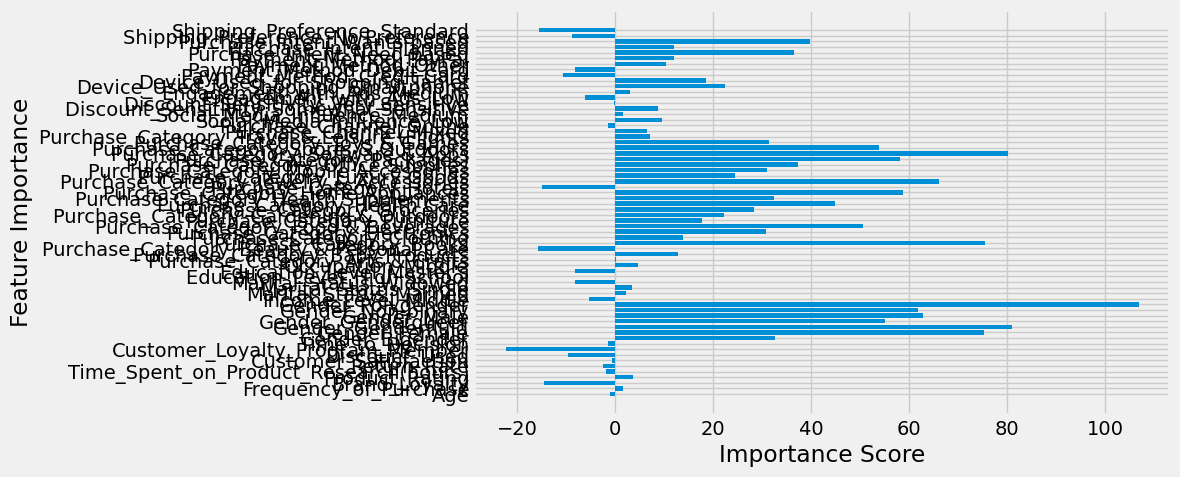

In [18]:
importance = reg.coef_ 
features = reg.feature_names_in_

plt.figure(figsize=(8, 5))
plt.barh(features, importance)
plt.xlabel("Importance Score")
plt.ylabel("Feature Importance")
plt.show()

#### XGBRegressor

In [19]:
xgbreg = XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
xgbreg.fit(X_train, y_train)

y_prediction = xgbreg.predict(X_test)

mse = mean_squared_error(y_test, y_prediction)
rmse = np.sqrt(mse)
print(f"MSE = {mse}. RMSE = {rmse}.") # MSE = 22890.666174973165. RMSE = 151.29661653511346.

MSE = 22890.666174973165. RMSE = 151.29661653511346.


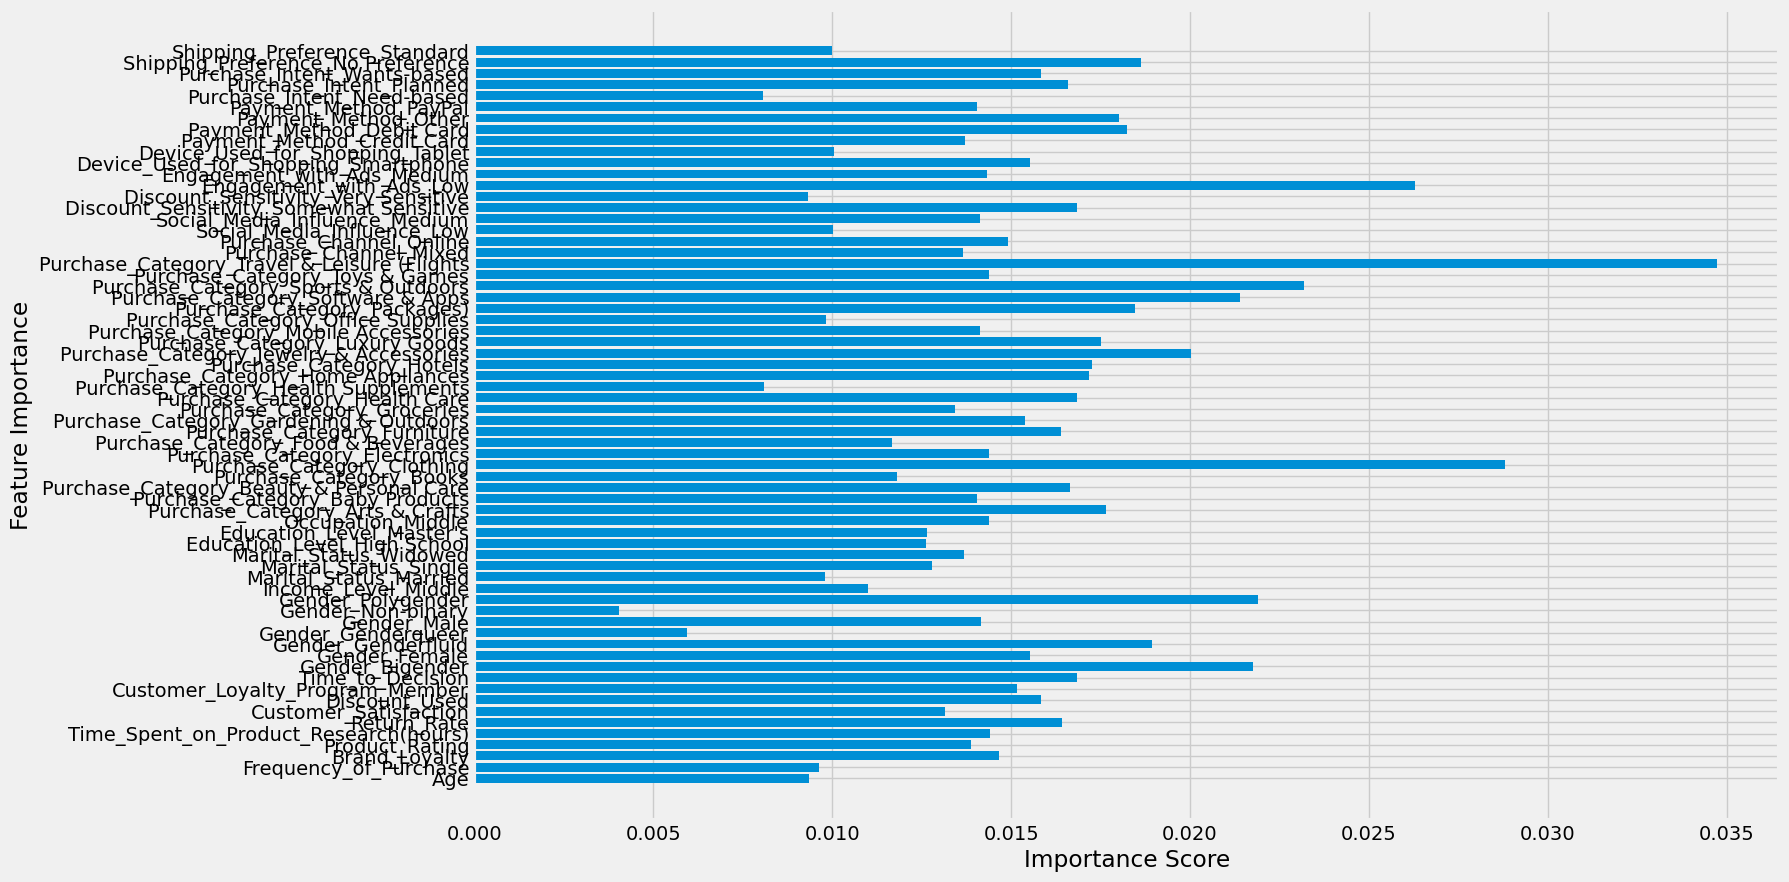

In [20]:
xgb_importance = xgbreg.feature_importances_ 
xgb_features = X.columns

plt.figure(figsize=(15, 10))
plt.barh(xgb_features, xgb_importance)
plt.xlabel("Importance Score")
plt.ylabel("Feature Importance")
plt.show()

### Classification

In [21]:
# Scale Purchase Amount. Now it will be used as a feature. 
data['Purchase_Amount'] = scaler.fit_transform(data[['Purchase_Amount']])

# Change the column 'Customer_Satisfaction' into categorical column 
data['Customer_Satisfaction'] = data['Customer_Satisfaction'].astype('category')

#### Logistic Regression

In [ ]:
logreg = LogisticRegression()

X = data.drop(['Customer_ID', 'Location', 'Time_of_Purchase', 'Customer_Satisfaction'], axis = 1)
y = data['Customer_Satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg.fit(X_train, y_train)
y_prediction = logreg.predict(X_test)

mse = mean_squared_error(y_test, y_prediction)
rmse = np.sqrt(mse)
print(f"MSE = {mse}. RMSE = {rmse}.")

acc_score = accuracy_score(y_test, y_prediction)
print(f"Prediction accuracy: {acc_score}")

# MSE = 15.03. RMSE = 3.8768543949960255.
# Prediction accuracy: 0.07

MSE = 15.03. RMSE = 3.8768543949960255.
Prediction accuracy: 0.07


In [ ]:
clf = tree.DecisionTreeClassifier()

clf.fit(X_train, y_train)
y_prediction = clf.predict(X_test)

mse = mean_squared_error(y_test, y_prediction)
rmse = np.sqrt(mse)
print(f"MSE = {mse}. RMSE = {rmse}.")

acc_score = accuracy_score(y_test, y_prediction)
print(f"Prediction accuracy: {acc_score}")

# MSE = 14.995. RMSE = 3.8723377951826463.
# Prediction accuracy: 0.145

MSE = 14.995. RMSE = 3.8723377951826463.
Prediction accuracy: 0.145
